# Predicting Stock Price Direction using Support Vector Machines

## Introduction

>The code showcases the application of machine learning i.e. Support Vector Machines (SVM), to predict the direction of stock prices. It utilizes historical stock price data and technical indicators to make predictions about future price movements.

## Applications

>Stock price direction prediction using SVM has various applications in finance and investment. It can assist traders and investors in making informed decisions by providing insights into potential price trends. Additionally, such models can be used to develop automated trading strategies that capitalize on predicted price movements.

In [2]:
# Machine learning 
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score 

# For data manipulation 
import pandas as pd 
import numpy as np 

# To plot 
import matplotlib.pyplot as plt 
plt.style.use('seaborn-darkgrid') 

# To ignore warnings 
import warnings 
warnings.filterwarnings("ignore")

D:\conda\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Loading the dataset

In [3]:
# Read the csv file using read_csv 
# method of pandas 
df = pd.read_csv(r'D:\WEBEL_Assignments\Machine_learning_RJSir\Projects\Project_5_Stock Price Prediction\Reliance.csv') 
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-11-18,463.799988,465.649994,454.975006,456.000000,436.671021,5142766.0
1,2015-11-19,459.450012,469.350006,458.625000,467.375000,447.563873,5569752.0
2,2015-11-20,467.000000,476.399994,462.774994,473.424988,453.357422,5167930.0
3,2015-11-23,475.000000,478.950012,473.100006,476.875000,456.661224,4800026.0
4,2015-11-24,476.500000,485.799988,475.524994,483.850006,463.340515,6768886.0
...,...,...,...,...,...,...,...
1228,2020-11-10,2077.000000,2090.000000,2041.199951,2084.550049,2084.550049,17045147.0
1229,2020-11-11,2089.000000,2095.000000,1978.099976,1997.199951,1997.199951,26178477.0
1230,2020-11-12,1981.000000,2008.449951,1965.000000,1980.000000,1980.000000,18481466.0
1231,2020-11-13,1982.000000,2036.650024,1981.750000,1996.400024,1996.400024,20946864.0


In [4]:
df.shape

(1233, 7)

>The dataset contains **1233** rows and **7** columns. Each row represents a day's stock market data, and each column represents a different attribute or feature of that day's data.

In [5]:
print(df.isnull().sum())  # Check for NaN values
print(df.notnull().sum())  # Check for infinite values


Date         0
Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64
Date         1233
Open         1232
High         1232
Low          1232
Close        1232
Adj Close    1232
Volume       1232
dtype: int64


## Data Cleaning and Preprocessing

In [6]:
# Replace NaN values with the mean of the column
df.fillna(df.mean(), inplace=True)

# Replace infinite values with a large finite value
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(1e10, inplace=True)  # Replace NaN with a large value

# Check if there are any NaN or infinite values remaining
print(df.isnull().sum())
print(df.notnull().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
Date         1233
Open         1233
High         1233
Low          1233
Close        1233
Adj Close    1233
Volume       1233
dtype: int64


In the above code, the NaN and infinite values are replaced with numbers using:

- NaN values in the DataFrame are replaced with the mean of each respective column using `df.fillna(df.mean(), inplace=True)`. This ensures that missing values are filled with a representative value based on the distribution of each feature.


- Infinite values (both positive and negative) are replaced with NaN using `df.replace([np.inf, -np.inf], np.nan, 
inplace=True)`.


- NaN values resulting from the replacement of infinite values are then filled with a large finite value (`1e10`) using `df.fillna(1e10, inplace=True)`.


- Finally, the code checks if there are any remaining NaN or infinite values in the DataFrame using `print(df.isnull().sum())` and `print(df.notnull().sum())`, ensuring that the data is clean and ready for further processing.

In [7]:
df.head() # Print the first five data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-11-18,463.799988,465.649994,454.975006,456.000000,436.671021,5142766.0
1,2015-11-19,459.450012,469.350006,458.625000,467.375000,447.563873,5569752.0
2,2015-11-20,467.000000,476.399994,462.774994,473.424988,453.357422,5167930.0
3,2015-11-23,475.000000,478.950012,473.100006,476.875000,456.661224,4800026.0
4,2015-11-24,476.500000,485.799988,475.524994,483.850006,463.340515,6768886.0


## Setting Date as Index and Dropping the Original Date Column

In [8]:
# Changes The Date column as index columns 
df.index = pd.to_datetime(df['Date']) 
df 

# drop The original date column 
df = df.drop(['Date'], axis='columns') 
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-11-18,463.799988,465.649994,454.975006,456.000000,436.671021,5142766.0
2015-11-19,459.450012,469.350006,458.625000,467.375000,447.563873,5569752.0
2015-11-20,467.000000,476.399994,462.774994,473.424988,453.357422,5167930.0
2015-11-23,475.000000,478.950012,473.100006,476.875000,456.661224,4800026.0
2015-11-24,476.500000,485.799988,475.524994,483.850006,463.340515,6768886.0
...,...,...,...,...,...,...
2020-11-10,2077.000000,2090.000000,2041.199951,2084.550049,2084.550049,17045147.0
2020-11-11,2089.000000,2095.000000,1978.099976,1997.199951,1997.199951,26178477.0
2020-11-12,1981.000000,2008.449951,1965.000000,1980.000000,1980.000000,18481466.0


- The code sets the 'Date' column as the index of the DataFrame using `df.index = pd.to_datetime(df['Date'])`. This converts the 'Date' column to datetime format and assigns it as the index of the DataFrame.


- After setting the 'Date' column as the index, the code drops the original 'Date' column from the DataFrame using `df = df.drop(['Date'], axis='columns')`. This removes the 'Date' column from the DataFrame, leaving only the columns representing the stock market data attributes.

## Creating Predictor Variables for Stock Price Prediction

In [9]:
# Create predictor variables 
df['Open-Close'] = df.Open - df.Close 
df['High-Low'] = df.High - df.Low 

# Store all predictor variables in a variable X 
X = df[['Open-Close', 'High-Low']] 
X.head() 

,Open-Close,High-Low
Date,,
2015-11-18,7.799988,10.674988
2015-11-19,-7.924988,10.725006
2015-11-20,-6.424988,13.625000
2015-11-23,-1.875000,5.850006
2015-11-24,-7.350006,10.274994




- The code creates two new columns in the DataFrame, `'Open-Close'` and `'High-Low'`, representing the price differences between the opening and closing prices, and the difference between the daily high and low prices, respectively.


- These new columns serve as predictor variables for the stock price prediction model.


- The code then creates a new DataFrame `X` containing only the 'Open-Close' and 'High-Low' columns, which will be used as the input features for the prediction model.


- `X.head()` displays the first five rows of the DataFrame `X` to show the newly created predictor variables.

## Creating Target Variables

In [10]:
# Target variables 
y = np.where(df['Close'].shift(-1) > df['Close'], 1, 0) 
y

array([1, 1, 1, ..., 1, 0, 0])

- The code calculates the target variable `y` for the stock price prediction model.


- It compares the 'Close' price of each day with the 'Close' price of the next day (shifted by -1 day).


> - If the 'Close' price of the next day is higher than the current day, it assigns `1` to `y`, indicating a positive price movement.
  
>- If the 'Close' price of the next day is lower or equal to the current day, it assigns `0` to `y`, indicating a negative or no price movement.


- This binary classification approach prepares the target variable `y` for training a machine learning model to predict whether the stock price will increase or decrease.

## Splitting the Data into Training and Test Sets

In [11]:
split_percentage = 0.8
split = int(split_percentage*len(df)) 

# Train data set 
X_train = X[:split] 
y_train = y[:split] 

# Test data set 
X_test = X[split:] 
y_test = y[split:]


- The code defines a `split_percentage` of 0.8, indicating an 80-20 split for training and testing data, respectively.


- It calculates the index at which to split the data by multiplying `split_percentage` by the length of the DataFrame (`len(df)`) and converting it to an integer (`int()`).


- The code then splits the predictor variables (`X`) and the target variable (`y`) into training and test sets based on the calculated split index.


- `X_train` and `y_train` contain the training data, which includes the first 80% of the rows, while `X_test` and `y_test` contain the test data, which includes the remaining 20% of the rows.

## Data Splitting Details based on `split_percentage`

In [12]:
print("Length of the original dataset", len(df))
print("Length of Train set : ",split)
print("Length of Test set : ",len(df)-split)

Length of the original dataset 1233
Length of Train set :  986
Length of Test set :  247


In [13]:
len(X_train)

986

In [14]:
len(X_test)

247

In [15]:
X_train

,Open-Close,High-Low
Date,,
2015-11-18,7.799988,10.674988
2015-11-19,-7.924988,10.725006
2015-11-20,-6.424988,13.625000
2015-11-23,-1.875000,5.850006
2015-11-24,-7.350006,10.274994
...,...,...
2019-11-15,-5.199952,23.650025
2019-11-18,13.450073,30.599976
2019-11-19,-42.750000,49.900024


## Building a `Support Vector Classifier` model for `Predicting Stock Price Direction`

In [17]:
# Support vector classifier
svc = SVC(random_state = 100)
cls = svc.fit(X_train, y_train)


> The code defines a **Support Vector Classifier (`SVC`)** with a random state of 100 to ensure reproducibility of results.   

> It then trains the classifier (`svc.fit()`) using the training data (`X_train` and `y_train`) to create a model (`cls`) that can predict whether the stock price will increase or decrease based on the predictor variables.

### Adding Predicted Signals to the DataFrame

In [18]:
df['Predicted_Signal'] = cls.predict(X)


>The code predicts the stock price direction for each day in the dataset using the trained classifier (`cls.predict(X)`) and assigns the predicted signals to a new column in the DataFrame called `'Predicted_Signal'`. Each value in this column represents the predicted direction of the stock price movement (1 for increase, 0 for decrease).

### Calculating and Adding Daily Returns to the Dataframe

In [19]:
# Calculate daily returns 
df['Return'] = df.Close.pct_change()


> The code calculates the daily returns of the stock price by using the `pct_change()` method on the 'Close' price column. The resulting values are assigned to a new column called `'Return'` in the DataFrame. Each value in this column represents the percentage change in the closing price from the previous day.

### Calculating and Adding Strategy Returns to the Dataframe¶

In [20]:
# Calculate strategy returns 
df['Strategy_Return'] = df.Return *df.Predicted_Signal.shift(1)



> The code calculates the strategy returns by multiplying the 'Return' column (which represents the daily returns of the stock) with the 'Predicted_Signal' column shifted by one day (`df.Predicted_Signal.shift(1)`). 
    
    
> Shifting the 'Predicted_Signal' column by one day ensures that the strategy return for a given day is based on the signal predicted for the previous day.
    
     
> The result is assigned to a new column called 'Strategy_Return' in the DataFrame. This column represents the returns generated by the trading strategy based on the predicted stock price movements.


### Calculating Cumulative Returns

In [21]:
# Calculate Cumulutive returns 
df['Cum_Ret'] = df['Return'].cumsum() 

> The code calculates the cumulative returns of the stock price by using the cumsum() method on the 'Return' column.

> The cumulative sum is calculated incrementally, where each value represents the cumulative return up to that point in time.

> The resulting values are assigned to a new column called 'Cum_Ret' in the DataFrame, which represents the cumulative returns of the stock over time.

In [22]:
# Print the updated dataset
df

,Open,High,Low,Close,Adj Close,Volume,Open-Close,High-Low,Predicted_Signal,Return,Strategy_Return,Cum_Ret
Date,,,,,,,,,,,,
2015-11-18,463.799988,465.649994,454.975006,456.000000,436.671021,5142766.0,7.799988,10.674988,1,NaN,NaN,NaN
2015-11-19,459.450012,469.350006,458.625000,467.375000,447.563873,5569752.0,-7.924988,10.725006,1,0.024945,0.024945,0.024945
2015-11-20,467.000000,476.399994,462.774994,473.424988,453.357422,5167930.0,-6.424988,13.625000,1,0.012945,0.012945,0.037890
2015-11-23,475.000000,478.950012,473.100006,476.875000,456.661224,4800026.0,-1.875000,5.850006,1,0.007287,0.007287,0.045177
2015-11-24,476.500000,485.799988,475.524994,483.850006,463.340515,6768886.0,-7.350006,10.274994,1,0.014626,0.014626,0.059804
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-10,2077.000000,2090.000000,2041.199951,2084.550049,2084.550049,17045147.0,-7.550049,48.800049,1,0.016507,0.000000,1.866347
2020-11-11,2089.000000,2095.000000,1978.099976,1997.199951,1997.199951,26178477.0,91.800049,116.900024,1,-0.041904,-0.041904,1.824444
2020-11-12,1981.000000,2008.449951,1965.000000,1980.000000,1980.000000,18481466.0,1.000000,43.449951,0,-0.008612,-0.008612,1.815832


>Note: The first value in the `'Return'`, `'Strategy_Return'`, and `'Cum_Ret'` columns is NaN because there is no previous day's closing price to calculate the return from. Since the return is calculated as the percentage change from the previous day's closing price to the current day's closing price, it cannot be calculated for the first day in the dataset.

## Plotting Cumulative Returns and Strategy Returns

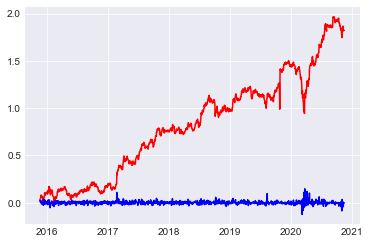

In [23]:
import matplotlib.pyplot as plt 
%matplotlib inline 

plt.plot(df['Cum_Ret'],color='red') 
plt.plot(df['Strategy_Return'],color='blue')

>This code plots the `cumulative returns` and `strategy returns` from a stock dataset. The cumulative returns represent the total returns over time, while the strategy returns represent the returns based on a trading strategy. The red line represents the cumulative returns, and the blue line represents the strategy returns.

## Visualising Stock Price Patterns and Trading Strategy Returns 

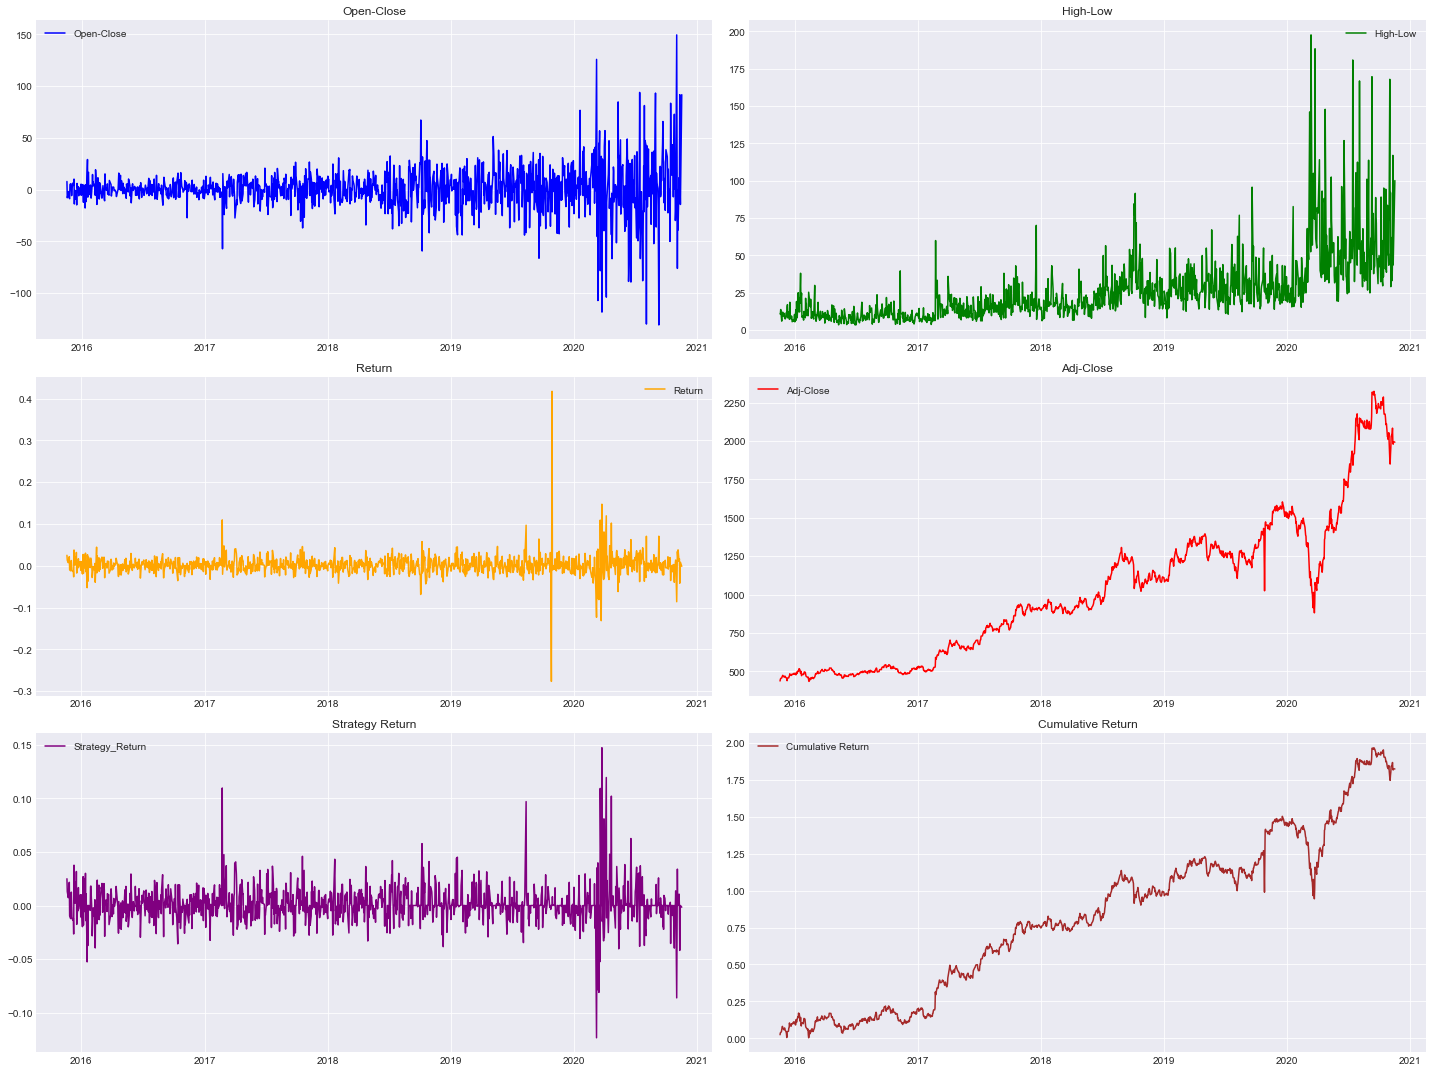

In [37]:
# Plotting the data
fig, ax = plt.subplots(3, 2, figsize=(20, 15))

# Open-Close plot
ax[0, 0].plot(df.index, df['Open-Close'], label='Open-Close', color='blue')
ax[0, 0].set_title('Open-Close')
ax[0, 0].legend()

# High-Low plot
ax[0, 1].plot(df.index, df['High-Low'], label='High-Low', color='green')
ax[0, 1].set_title('High-Low')
ax[0, 1].legend()


# Return plot
ax[1, 0].plot(df.index, df['Return'], label='Return', color='orange')
ax[1, 0].set_title('Return')
ax[1, 0].legend()

# High-Low plot
ax[1, 1].plot(df.index, df['Adj Close'], label='Adj-Close', color='red')
ax[1, 1].set_title('Adj-Close')
ax[1, 1].legend()

# Strategy Return plot
ax[2, 0].plot(df.index, df['Strategy_Return'], label='Strategy_Return', color='purple')
ax[2, 0].set_title('Strategy Return')
ax[2, 0].legend()

# Cumulative Return plot
ax[2, 1].plot(df.index, df['Cum_Ret'], label='Cumulative Return', color='brown')
ax[2, 1].set_title('Cumulative Return')
ax[2, 1].legend()

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()


>This code generates a multi-plot visualization to explore patterns in stock price movements, including `open-close and high-low price differentials, daily returns, adjusted closing prices`, and the performance of a trading strategy based on predicted signals. The visualization helps in understanding the dataset's trends and the effectiveness of the trading strategy.

The insights we can gather from the graphs:

1. **Trend Analysis**: 
   - The adjusted close price graph shows a generally upward trend over time, indicating overall growth in the stock price.
   - The cumulative return graph also displays a positive trend, suggesting that the trading strategy has generated profits over the observed period.


2. **Volatility Assessment**:
   - High fluctuations in the open-close and high-low price differentials indicate significant volatility in the stock's daily movements. This volatility may present both opportunities and risks for traders.


3. **Profitability Evaluation**:
   - Peaks in the strategy return graph indicate periods of profit generation by the trading strategy, while troughs suggest periods of losses.
   - The cumulative return graph provides an overall view of profitability, with upward trends indicating net profits and downward trends indicating losses.


4. **Risk Analysis**:
   - Large spikes or dips in the daily returns and strategy returns graphs may signal periods of high risk or unexpected market events. Understanding these fluctuations helps in managing risk exposure.



## SVM Model Accuracy Evaluation

In [38]:
# Predict on the test set
y_pred = cls.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", round(accuracy*100,2))


Accuracy: 45.75


### Analysis of Predicted Model

In [39]:
from sklearn.metrics import confusion_matrix
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[39 83]
 [51 74]]


|            | Predicted Negative | Predicted Positive |
|------------|--------------------|--------------------|
| Actual Negative (TN) | 39                 | 83                 |
| Actual Positive (FN) | 51                 | 74                 |


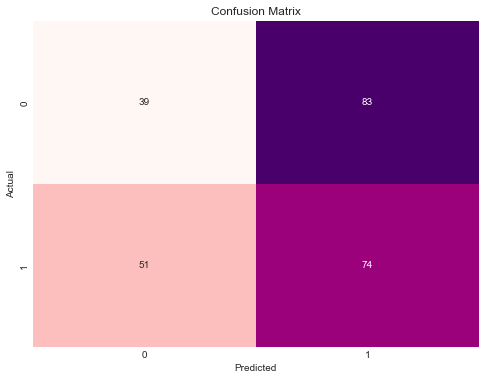

In [28]:
import seaborn as sns
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='RdPu', fmt='g', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Model Performance Evaluation with Classification Report

In [40]:
from sklearn.metrics import classification_report

# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.43      0.32      0.37       122
           1       0.47      0.59      0.52       125

    accuracy                           0.46       247
   macro avg       0.45      0.46      0.45       247
weighted avg       0.45      0.46      0.45       247



The classification report provides a summary of various evaluation metrics for the model's performance on the test set:

- **Precision:** Indicates the proportion of true positive predictions among all positive predictions. For class 0, the precision is 0.43, and for class 1, it is 0.47. This means that out of all instances predicted as class 0, only 43% were actually class 0, and out of all instances predicted as class 1, only 47% were actually class 1.


- **Recall:** Also known as sensitivity or true positive rate, it measures the proportion of actual positives that were correctly predicted by the model. For class 0, the recall is 0.32, and for class 1, it is 0.59. This indicates that the model could capture only 32% of the actual class 0 instances and 59% of the actual class 1 instances.


- **F1-score:** The harmonic mean of precision and recall, providing a balance between the two metrics. For class 0, the F1-score is 0.37, and for class 1, it is 0.52.


- **Support:** The number of actual occurrences of each class in the test set. There are 122 instances of class 0 and 125 instances of class 1.


- **Accuracy:** The overall accuracy of the model on the test set is 46%, indicating the proportion of correctly predicted instances out of all instances.

# Predicting Stock Price Direction using Other Algorithms 

# Random Forest Classifier Model

In [55]:
# Using Scikit-learn to split data into training and testing sets 
from sklearn.model_selection import train_test_split 
# Split the data into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split( 
        X, y, test_size = 0.2, random_state = 100)

In [57]:
from sklearn.ensemble import RandomForestClassifier
# Train the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", round(accuracy*100,2))

Accuracy: 51.42


In this section, a **Random Forest classifier model** is trained and evaluated:

- **Training the Model:** The Random Forest classifier is trained with 100 decision trees (`n_estimators=100`) and a random state of 42 for reproducibility.
  
  
- **Making Predictions:** The trained model is used to predict the target variable for the test dataset (`X_test`), resulting in predicted labels stored in `y_pred`.


- **Accuracy Calculation:** The accuracy of the model is calculated by comparing the predicted labels (`y_pred`) with the actual labels from the test dataset (`y_test`). The accuracy score represents the proportion of correctly predicted instances out of all instances in the test set.


- **Output:** The accuracy of the Random Forest classifier model is printed, rounded to two decimal places, indicating the percentage of correctly classified instances.

The same procedure is used below for predicting the model using **Decision Tree Classifier**.  

In [59]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[51 58]
 [58 80]]


# Decision Tree Classifier Model

In [60]:
from sklearn.tree import DecisionTreeClassifier
# Train the Decision Tree model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Make predictions
y_pred = dt.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", round(accuracy*100,2))

Accuracy: 53.04


In [61]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[51 58]
 [58 80]]



|         | Predicted Negative | Predicted Positive |
|---------|--------------------|--------------------|
| Actual Negative | 51 | 58 |
| Actual Positive | 58 | 80 |



Based on the **Accuracy Scores**, the **Decision Tree Classifier** performed the best with an accuracy of **53.04%**, followed by the **Random Forest Classifier** with an accuracy of **51.42%**, and the **Support Vector Machine (SVM)** with an accuracy of **45.75%**.